Looking at T-S plots for Deep Bay in June

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import nc_tools 
import netCDF4 as nc

In [56]:
Jun = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
May = sorted(glob.glob('/results/SalishSea/hindcast/*may15/*1h*grid_T*'))

In [34]:
def make_TS_with_scaled_markers(files,lon,lat, depth,start_time,end_time):    
    with nc_tools.scDataset(files) as f:
        t = f.variables['votemper'][start_time:end_time,depth,lon,lat]
        s = f.variables['vosaline'][start_time:end_time,depth,lon,lat]
        ssh = f.variables['sossheig'][start_time:end_time,lon,lat]
        lows = []
        highs = []
        start_point = 0
        interval = 9
        target = 'low'
        while (start_point + interval) < (end_time - start_time - 1):
            if target == 'low':
                low = np.argmin(ssh[start_point:start_point + interval])
                lows.append(low + start_point)
                start_point = low + start_point 
                target = 'high'
            elif target == 'high':
                high = np.argmax(ssh[start_point:start_point + interval])
                highs.append(high + start_point)
                start_point = high + start_point 
                target = 'low'
        list_of_differences = []
        if len(lows) > len(highs):
            for n in range(len(highs)):
                difference = ssh[highs[n]] - ssh[lows[n+1]]
                list_of_differences.append(np.abs(difference))  
        else:
            for n in range(len(highs)-1):
                difference = ssh[highs[n]] - ssh[lows[n+1]]
                list_of_differences.append(np.abs(difference))
        fig,ax = plt.subplots(1,1,figsize=(8,8))
        k = 0
        if len(lows) > len(highs):
            for m in highs:
                ax.plot(s[m], t[m], 'ro', markersize = 6*(list_of_differences[k]+1), alpha=0.7)
                k = k+1
        else:
            for m in highs[:-1]:
                ax.plot(s[m], t[m], 'ro',markersize = 6*(list_of_differences[k]+1), alpha=0.7)
                k = k + 1
            ax.plot(s[highs[-1]],t[highs[-1]],'r^',markersize=20,alpha=0.7)
        for n in lows:
            ax.plot(s[n], t[n], 'go')
        ax.plot(s[0],t[0],'y*', markersize = 20)
        ax.plot(s[:],t[:])
        ax.grid('on')
        ax.set_title('TS plot at depth=' + str(depth)+", lon=" + str(lon) + ", lat=" + str(lat)
                    + " from hour=" + str(start_time) + " to hour=" + str(end_time-1))

# Last four days of May

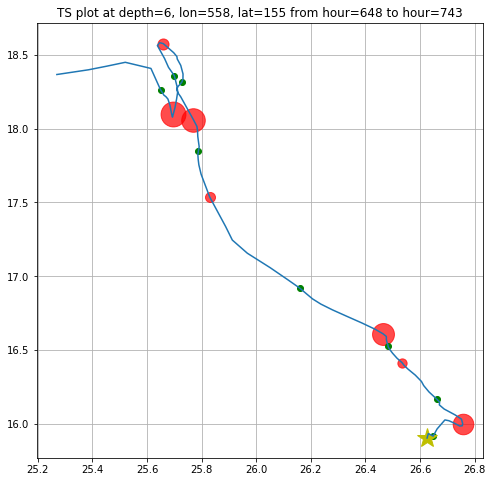

In [64]:
make_TS_with_scaled_markers(May,558,155,6,744-96,744)

# Last four days of May and first eight days of June 

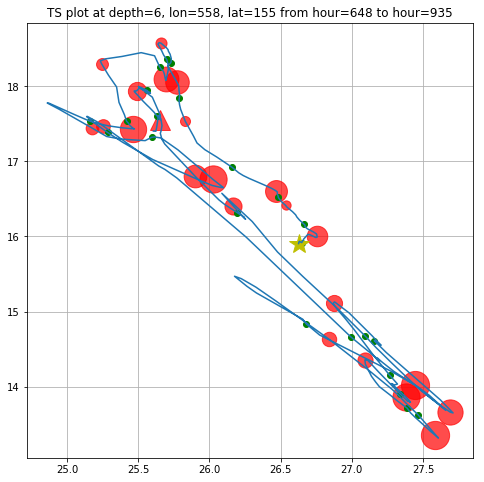

In [65]:
MayJune = May + Jun
make_TS_with_scaled_markers(MayJune,558,155,6,648,744+192)

# First four days of June

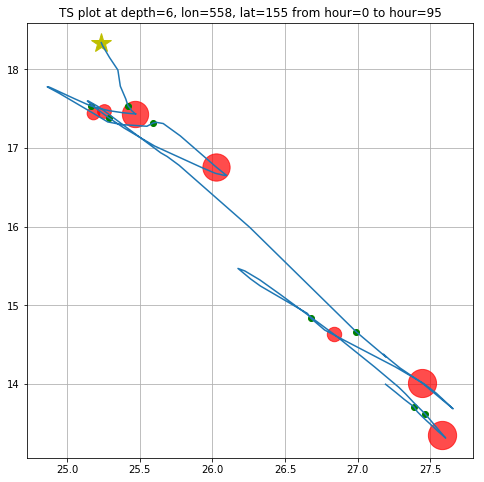

In [35]:
make_TS_with_scaled_markers(Jun,558,155,6,0,96)

# Next four days of June

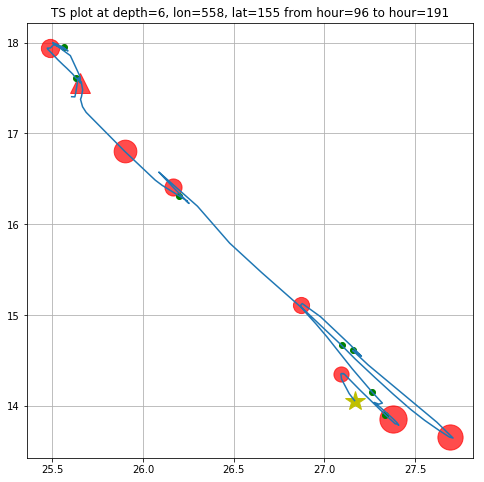

In [41]:
make_TS_with_scaled_markers(Jun,558,155,6,96,192)

# First eights days of June

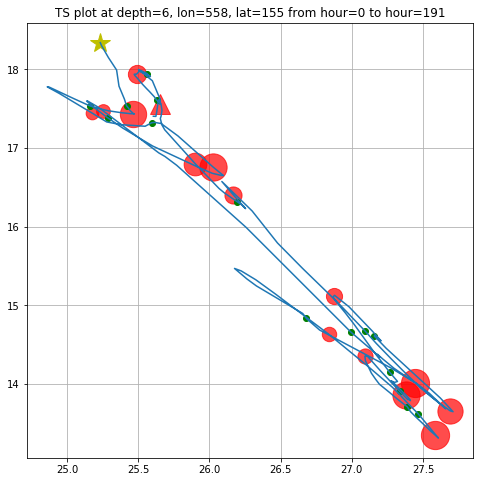

In [60]:
make_TS_with_scaled_markers(Jun,558,155,6,0,192)

# And then it gets hairball y...

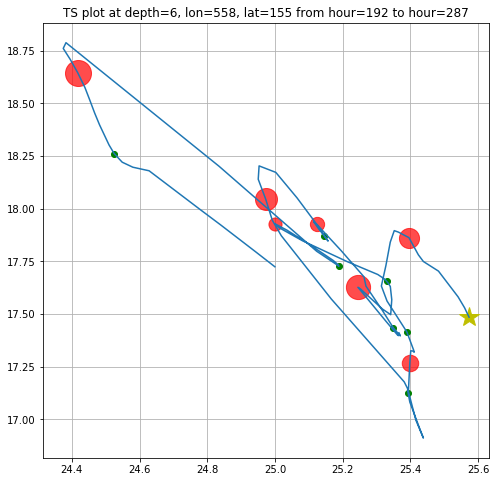

In [48]:
make_TS_with_scaled_markers(Jun,558,155,6,192,192+96)

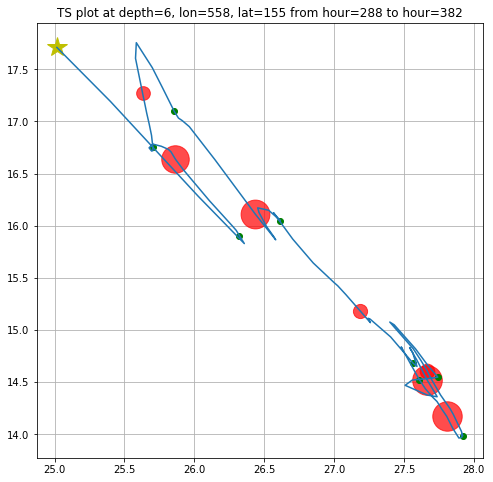

In [44]:
make_TS_with_scaled_markers(Jun,558,155,6,192+96,287+96)

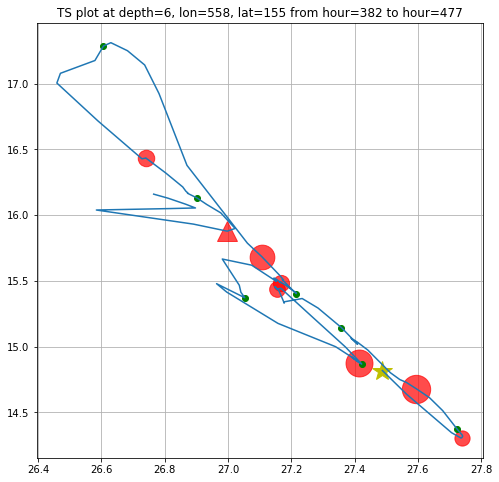

In [45]:
make_TS_with_scaled_markers(Jun,558,155,6,382,382+96)

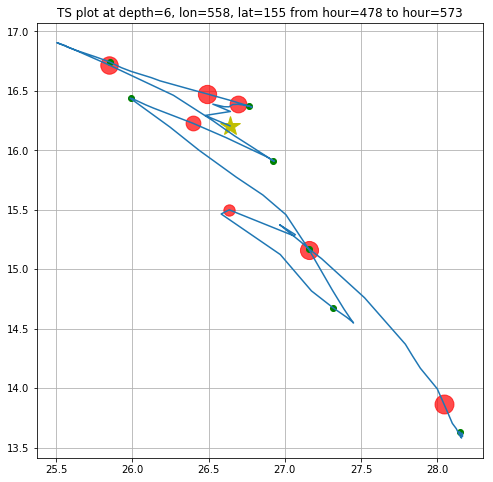

In [49]:
make_TS_with_scaled_markers(Jun,558,155,6,478,478+96)

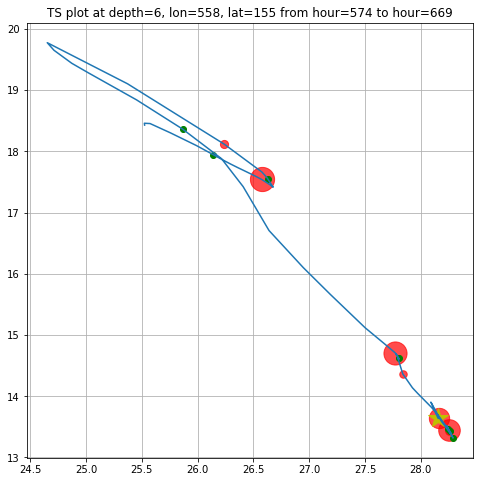

In [50]:
make_TS_with_scaled_markers(Jun,558,155,6,574,574+96)